In [277]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler



In [278]:
data_path = "processing/AITEX_cleaned_02.csv"
df = pd.read_csv(data_path,sep=';')

In [279]:
df.columns

Index(['Nº holes / Nº filaments', 'Diameter (mm)', 'L/D', 'Filter (um)',
       'Sand quantity (cm)', 'Support', 'Vpump (rpm)', 'Vext (rpm)',
       'TE1 (°C)', 'TE2 (°C)', 'TD(°C)', 'PD(bar)', 'PE(bar)', 'VTO (m/min)',
       'VG1(m/min)', 'VG2(m/min)', 'Vwinder (m/min)', 'Winder tension (N)',
       'Tg1(°C)', 'Tg3(°C)', 'Quench (%)', 'Spin. F (rmp)', 'Height (m)',
       'Count (dtex)', 'Tenacity (g/den)', 'Elongation (%)',
       'Sand size min (um)', 'Sand size max (um)', 'Material'],
      dtype='object')

In [280]:
X = df[["Tenacity (g/den)", 
        "Count (dtex)",
        "Elongation (%)"]].values

In [281]:
X

array([[  0.54, 155.  ,  44.94],
       [  1.64, 170.  ,  64.69],
       [  1.67, 160.  ,  73.79],
       ...,
       [  2.16, 133.  , 128.  ],
       [  2.62, 136.  , 130.67],
       [  2.9 , 148.  , 147.  ]])

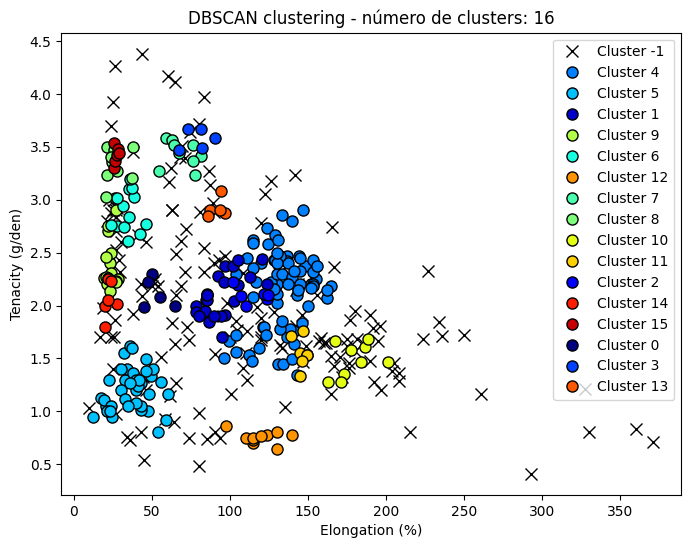

In [282]:

# Estandarizamos los datos para que DBSCAN funcione mejor
Scaler = StandardScaler()
X_mu = X.mean(axis=0)
X_std = X.std(axis=0)

X = (X - X_mu) / X_std

# Aplicamos DBSCAN
# eps: distancia máxima entre puntos para que se consideren vecinos
# min_samples: número mínimo de puntos para formar un cluster
db = DBSCAN(eps=0.325, min_samples=5).fit(X)

# Obtenemos las etiquetas de los clusters (los puntos -1 son ruido)
labels = db.labels_


# Número de clusters encontrados (excluyendo el ruido si existe)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Visualizamos los resultados
plt.figure(figsize=(8, 6))
unique_labels = set(labels)
# ordeamos por tamaño
unique_labels = sorted(unique_labels, key=lambda x: np.sum(labels == x), reverse=True)

for k in unique_labels:
    # Si el label es -1, es ruido
    if k == -1:
        col = 'k'
        marker = 'x'
    else:
        col = plt.cm.jet(float(k) / n_clusters)
        marker = 'o'

    # Seleccionamos los datos correspondientes al cluster
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    xy_rescaled = xy * X_std + X_mu

    # Dibujamos los puntos
    plt.plot(xy_rescaled[:, 2], xy_rescaled[:, 0], 
             marker, markerfacecolor=col, 
             label=f"Cluster {k}",
             markeredgecolor='k', markersize=8)

plt.title(f"DBSCAN clustering - número de clusters: {n_clusters}")
plt.ylabel("Tenacity (g/den)")
plt.xlabel("Elongation (%)")
plt.legend()
plt.show()



In [283]:
distribution = []
for k in unique_labels:
    data = df[labels == k]["Material"].value_counts()
    distribution.append({
        "data":data.index.values,
        "label":k,
        "count": np.sum(data.values),
        "count_mat" : len(data)
    })
distribution = pd.DataFrame(distribution)

In [284]:
distribution
distribution.to_csv("processing/dbscan_distribution.csv",index=False)

In [285]:
distribution

,data,label,count,count_mat
0,"[PE PURELL GA7760 + 4% Aditivo, PP HS61R, PBS,...",-1,160,66
1,"[rPET, BATCH 2, rPET BATCH 1, Reclado químico ...",4,75,24
2,"[PHB DAN 04493, PLA + 0.1 Silano, PHB 2450 mod...",5,38,9
3,"[PLA + CaCO3, PLA, PP H561R, PET + 3% Antiviri...",1,24,10
4,"[TPX, TPX DX350, TPX 350, PP + FR, TPX DX350 0...",9,16,7
5,"[ADUANITE S3001, ADVANITE 53001, LOWMELT 53001...",6,14,4
6,"[TPE Producción, TPE + 10% Plastificante, SPH16]",12,10,3
7,"[PA H24, PP + 07%Amarillo + 2%UV 792930, PA, P...",7,9,6
8,"[TPX DX350, rPET, PET + 15% SPH16, TPX, PP + FR]",8,9,5
9,"[rPET 30/70, rPET + PTT, PP + Talco + Verde]",10,9,3


/tmp/ipykernel_4030222/3686400613.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')


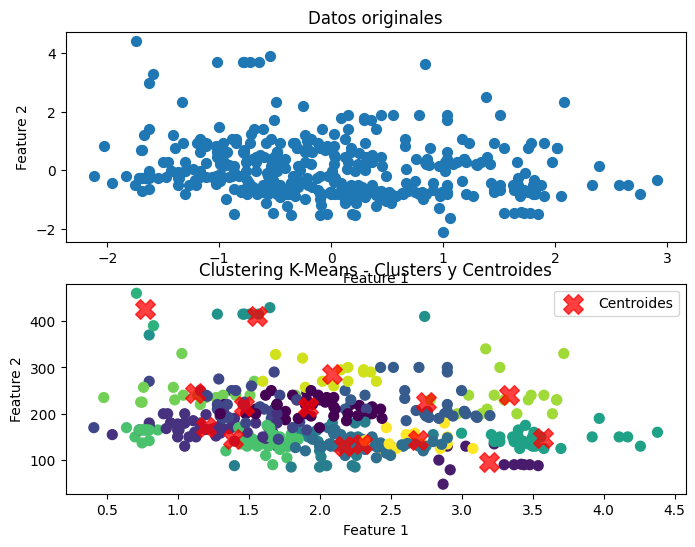

In [286]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
plt.figure(figsize=(8, 6))

# Generamos datos de ejemplo con blobs
X = df[["Tenacity (g/den)", 
        "Count (dtex)",
        "Elongation (%)"]].values

# Estandarizamos los datos para que K-Means funcione mejor
X_mu = X.mean(axis=0)
X_std = X.std(axis=0)

X = (X - X_mu) / X_std
# Visualizamos los datos originales
plt.subplot(2, 1, 1)
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')
plt.title("Datos originales")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Aplicamos K-Means
# n_clusters: número de clusters que queremos encontrar
# random_state: para reproducibilidad de resultados
n_clusters = 15
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Visualizamos los clusters resultantes y los centroides
plt.subplot(2, 1, 2)
X = X * X_std + X_mu
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centroids = kmeans.cluster_centers_
centroids = centroids * X_std + X_mu
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroides')
plt.title("Clustering K-Means - Clusters y Centroides")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()


In [287]:
distribution = []

for k in range(n_clusters):
    data = df[y_kmeans == k]["Material"].value_counts()
    distribution.append({
        "data":data.index.values,
        "label":k,
        "count": np.sum(data.values),
        "count_mat" : len(data)
    })
distribution = pd.DataFrame(distribution)

distribution.to_csv("processing/kmeans_distribution.csv",index=False)